# Try for test case 01 using globcurrent data

## 14 days

## adapted from test05 of GlobCurrent

In [1]:
#%matplotlib inline
import numpy as np
from datetime import timedelta, datetime

In [2]:
from glob import glob
import xarray as xr
import matplotlib.pyplot as plt
from netCDF4 import num2date, date2num


import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib import colors 

import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter#
import matplotlib.ticker as mticker


* Case 1: Incident occurred on 10/09/2011, west coast of Denmark, ~40km SW of Ringkobing Fjord. Collision with a fishing vessel. Substance spilt was bunker fuel (IFO), Swedish coast impacted.
    * Approx: 55.791887, 7.696803

In [4]:
data_path_v01 = '/data/oceanparcels/input_data/ESA_WorldOceanCirculation/NorthAtlantic/'
fname_v01 = 'runWOC_NATL_4lb_v1_201109*.nc' #runWOC_NATL_4lb_v1_20110901.nc

In [5]:
outdir =  "/data/oceanparcels/output_data/data_LauraGN/outputs_parcels/WOC/Oil/"

In [5]:
!ls

20110910000000-WOC-L4-CURlag-NATL_oil_spill_drift_1H_00m_continuous-v1.0-fv1.0.nc
20110910000000-WOC-L4-CURlag-NATL_oil_spill_drift_1H_00m_instantaneous-v1.0-fv1.0.nc
20110910000000-WOC-L4-CURlag-NATL_oil_spill_drift_1H_15m_continuous-v1.0-fv1.0.nc
20110910000000-WOC-L4-CURlag-NATL_oil_spill_drift_1H_15m_instantaneous-v1.0-fv1.0.nc
20180312065959-WOC-L4-CURlag-TATL_sargassum_drift_1H_00m_drifters_180days-v1.0-fv1.0.nc
20180312065959-WOC-L4-CURlag-TATL_sargassum_drift_1H_15m_drifters_180days-v1.0-fv1.0.nc
2021-06-20_Oil_depth00m-15m_starting20110910_ANIM.ipynb
2021-06-20_Oil_depth00m-15m_starting20110910_repeatDT_ANIM.ipynb
2021-06-20_Sargassum_depth00m-15m_MESH_ANIM.ipynb
2021-06-20_Sargassum_depth00m-15m_drifters.ipynb
anim_oil_repeatDT.mp4
anim_test.mp4
anim_test02.mp4
anim_test03.mp4
sargassum_parcels_Clement_v01_00m_MESH_90days.nc
sargassum_parcels_Clement_v01_15m_MESH_90days.nc


# 4. Checking the outputs:

In [8]:
#outdir + 
ds_00 = xr.open_dataset("sargassum_parcels_Clement_v01_00m_MESH_90days.nc")
ds_15 = xr.open_dataset("sargassum_parcels_Clement_v01_15m_MESH_90days.nc")

# 4.1 Plotting:

Text(0.5, 1.0, '15m')

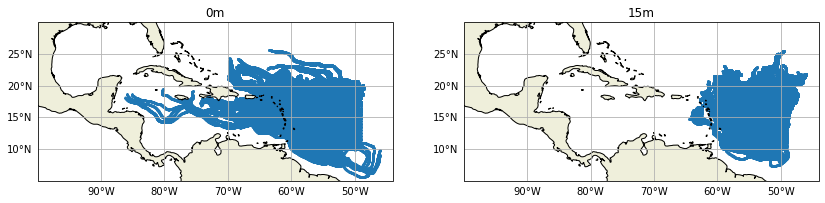

In [10]:
plt.figure(figsize=(14,7)) #(17,5)

ax1 = plt.subplot(121, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
ax1.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'])

ax1.scatter(ds_00['lon'], ds_00['lat'], s=1, transform=ccrs.PlateCarree()) #marker='o'
ax1.set_xlim([-100., -44.])
ax1.set_ylim([5., 30.])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
#gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('0m', size=12)

ax1 = plt.subplot(122, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
ax1.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'])

ax1.scatter(ds_15['lon'], ds_15['lat'], s=1, transform=ccrs.PlateCarree()) #marker='o'
ax1.set_xlim([-100., -44.])
ax1.set_ylim([5., 30.])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
#gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('15m', size=12)



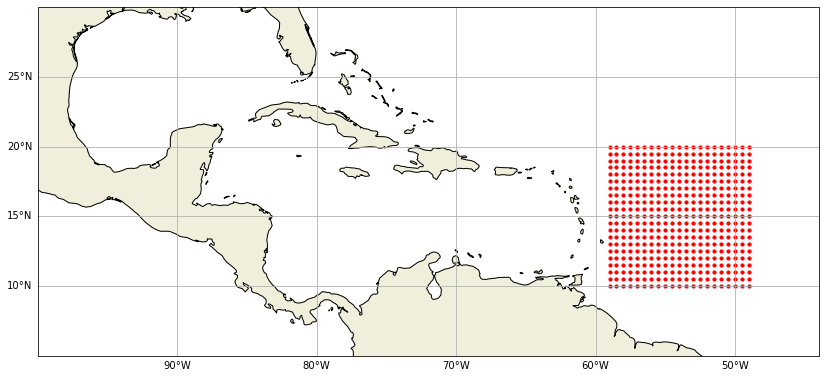

In [17]:
plt.figure(figsize=(14,7)) #(17,5)

ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
ax1.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'])

ax1.scatter(ds_00['lon'][:,0], ds_00['lat'][:,0], c='r', s=10, transform=ccrs.PlateCarree(), label='Start') #marker='o'

ax1.set_xlim([-100., -44.])
ax1.set_ylim([5., 30.])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
#gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER




/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to t

Text(0.5, 1.0, '15m')

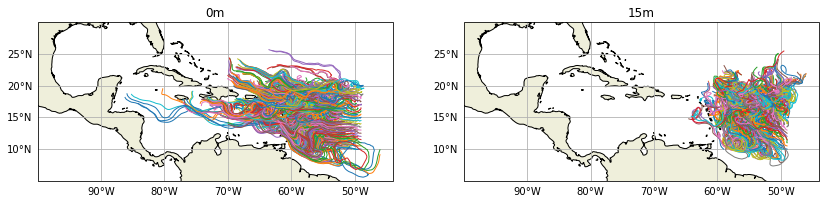

In [15]:
plt.figure(figsize=(14,7)) #(17,5)

ax1 = plt.subplot(121, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
ax1.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'])

ax1.plot(ds_00['lon'].T, ds_00['lat'].T, '-', linewidth=1, transform=ccrs.PlateCarree()) #marker='o'

ax1.set_xlim([-100., -44.])
ax1.set_ylim([5., 30.])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
#gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('0m', size=12)

ax1 = plt.subplot(122, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
ax1.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'])

ax1.plot(ds_15['lon'].T, ds_15['lat'].T, '-', linewidth=1, transform=ccrs.PlateCarree()) #marker='o'

ax1.set_xlim([-100., -44.])
ax1.set_ylim([5., 30.])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
#gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('15m', size=12)




# Beaching:

In [18]:
mask_particles_00 = np.ones_like(ds_00['lat']) * np.nan
mask_particles_15 = np.ones_like(ds_15['lat']) * np.nan

In [20]:
ds_vel = xr.open_mfdataset('runWOC_TATL_v1_20180301.nc')

In [21]:
ds_vel

<xarray.Dataset>
Dimensions:  (depth: 2, lat: 126, lon: 266, time: 24)
Coordinates:
  * lon      (lon) float32 -99.0 -98.8 -98.6 -98.4 ... -46.6 -46.4 -46.2 -46.0
  * lat      (lat) float32 5.0 5.2 5.4 5.6 5.8 6.0 ... 29.2 29.4 29.6 29.8 30.0
  * time     (time) datetime64[ns] 2018-03-01 ... 2018-03-01T23:00:16
  * depth    (depth) float32 0.0 15.0
Data variables:
    utot     (time, depth, lat, lon) float32 dask.array<chunksize=(24, 2, 126, 266), meta=np.ndarray>
    vtot     (time, depth, lat, lon) float32 dask.array<chunksize=(24, 2, 126, 266), meta=np.ndarray>
Attributes:
    description:   WOC theme 3

In [22]:
ds_vel['mask'] = (('depth', 'lat', 'lon'), ds_vel.utot[0,:,:,:].to_masked_array().mask.astype('int')) 



In [23]:
for tt in range(0, ds_00['lat'].shape[0]):
    for oo in range(0, ds_00['lat'].shape[1]):
            if np.isnan(ds_00['lat'][tt,oo]):
                continue
            else:
                mask_particles_00[tt,oo] = ds_vel.mask[0,:,:].sel(lat=ds_00['lat'][tt,oo], lon=ds_00['lon'][tt,oo], method='nearest')
# vel_mask[1,:,:] as 15m 



In [24]:
for tt in range(0, ds_15['lat'].shape[0]):
    for oo in range(0, ds_15['lat'].shape[1]):
            if np.isnan(ds_15['lat'][tt,oo]):
                continue
            else:
                mask_particles_15[tt,oo] = ds_vel.mask[0,:,:].sel(lat=ds_15['lat'][tt,oo], lon=ds_15['lon'][tt,oo], method='nearest')
# vel_mask[1,:,:] as 15m 



In [26]:
np.savez('masks_MESH.npz', mask_particles_00=mask_particles_00, mask_particles_15=mask_particles_15) 


# Animation:

In [25]:
ds_00['time'].values

array([['2018-03-01T00:00:00.000000000', '2018-03-01T01:00:00.000000000',
        '2018-03-01T02:00:00.000000000', ...,
        '2018-05-29T22:00:00.000000000', '2018-05-29T23:00:00.000000000',
        '2018-05-30T00:00:00.000000000'],
       ['2018-03-01T00:00:00.000000000', '2018-03-01T01:00:00.000000000',
        '2018-03-01T02:00:00.000000000', ...,
        '2018-05-29T22:00:00.000000000', '2018-05-29T23:00:00.000000000',
        '2018-05-30T00:00:00.000000000'],
       ['2018-03-01T00:00:00.000000000', '2018-03-01T01:00:00.000000000',
        '2018-03-01T02:00:00.000000000', ...,
        '2018-05-29T22:00:00.000000000', '2018-05-29T23:00:00.000000000',
        '2018-05-30T00:00:00.000000000'],
       ...,
       ['2018-03-01T00:00:00.000000000', '2018-03-01T01:00:00.000000000',
        '2018-03-01T02:00:00.000000000', ...,
        '2018-05-29T22:00:00.000000000', '2018-05-29T23:00:00.000000000',
        '2018-05-30T00:00:00.000000000'],
       ['2018-03-01T00:00:00.000000000', '20

In [10]:
outputdt = timedelta(hours=1)
timerange = np.arange(np.min(ds_00['time'].values),
                      (np.datetime64('2011-09-12T23:00:00.000000000'))+np.timedelta64(outputdt), 
                      outputdt)  # timerange in nanoseconds



In [14]:
%%capture

fig = plt.figure(figsize=(14,10)) #(17,5)

ax1 = plt.subplot(121, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
#ax1.add_feature(cartopy.feature.LAND, facecolor='black')
ax1.set_xlim([6.5, 11])
ax1.set_ylim([54.5, 59])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('0m', size=12)

ax2 = plt.subplot(122, projection=ccrs.PlateCarree())
ax2.coastlines(resolution='50m')
ax2.set_xlim([6.5, 11])
ax2.set_ylim([54.5, 59])
gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax2.set_title('15m', size=12)

time_id = np.where(ds_00['time'] == timerange[0]) # Indices of the data where time = 0

# Plot

plot_00 = ax1.scatter(ds_00['lon'].values[time_id], ds_00['lat'].values[time_id], s=1, transform=ccrs.PlateCarree()) #marker='o'
plot_15 = ax2.scatter(ds_15['lon'].values[time_id], ds_15['lat'].values[time_id], s=1, transform=ccrs.PlateCarree()) #marker='o'


t = str(timerange[0]) #.astype('timedelta64[h]'))
title = plt.suptitle('Particles at t = ' + str(t[0:10]) + ' ' + str(t[11:16]), size=24)

def animate(i):
    t = str(timerange[i]) #.astype('timedelta64[h]'))
    title.set_text('Particles at t = ' + str(t[0:10]) + ' ' + str(t[11:16]))
    
    time_id = np.where(ds_00['time'] == timerange[i])
    plot_00.set_offsets(np.c_[ds_00['lon'].values[time_id], ds_00['lat'].values[time_id]])
    plot_15.set_offsets(np.c_[ds_15['lon'].values[time_id], ds_15['lat'].values[time_id]])

anim = FuncAnimation(fig, animate, frames = len(timerange), interval=500)

In [15]:
# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

anim.save('anim_test.mp4', writer=writer, dpi=500)

In [16]:
!ls

20110910000000-WOC-L4-CURlag-NATL_oil_spill_drift_1H_00m_instantaneous-v1.0-fv1.0.nc
20110910000000-WOC-L4-CURlag-NATL_oil_spill_drift_1H_15m_instantaneous-v1.0-fv1.0.nc
2021-06-20_Oil_depth00m-15m_starting20110910_ANIM.ipynb
anim_test.mp4


# --> plotting onlt latest point, so plot one on to of other:

In [20]:
%%capture

fig = plt.figure(figsize=(6,10)) #(17,5)

ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
#ax1.add_feature(cartopy.feature.LAND, facecolor='black')
ax1.set_xlim([6.5, 11])
ax1.set_ylim([54.5, 59])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

time_id = np.where(ds_00['time'] == timerange[0]) # Indices of the data where time = 0

# Plot

plot_00 = ax1.scatter(ds_00['lon'].values[time_id], ds_00['lat'].values[time_id]
                      , c='b', s=5, transform=ccrs.PlateCarree(), label='0m') #marker='o'
plot_15 = ax1.scatter(ds_15['lon'].values[time_id], ds_15['lat'].values[time_id]
                      , c='r', s=5, transform=ccrs.PlateCarree(), label='15m') #marker='o'

t = str(timerange[0]) #.astype('timedelta64[h]'))
title = plt.suptitle('Particles at t = ' + str(t[0:10]) + ' ' + str(t[11:16]), size=24)

def animate(i):
    t = str(timerange[i]) #.astype('timedelta64[h]'))
    title.set_text('Particles at t = ' + str(t[0:10]) + ' ' + str(t[11:16]))
    
    time_id = np.where(ds_00['time'] == timerange[i])
    plot_00.set_offsets(np.c_[ds_00['lon'].values[time_id], ds_00['lat'].values[time_id]])
    plot_15.set_offsets(np.c_[ds_15['lon'].values[time_id], ds_15['lat'].values[time_id]])

ax1.legend(loc=2)

anim = FuncAnimation(fig, animate, frames = len(timerange), interval=500)

In [21]:
# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

anim.save('anim_test02.mp4', writer=writer, dpi=500)

In [22]:
!ls

20110910000000-WOC-L4-CURlag-NATL_oil_spill_drift_1H_00m_instantaneous-v1.0-fv1.0.nc
20110910000000-WOC-L4-CURlag-NATL_oil_spill_drift_1H_15m_instantaneous-v1.0-fv1.0.nc
2021-06-20_Oil_depth00m-15m_starting20110910_ANIM.ipynb
anim_test.mp4
anim_test02.mp4


# --> cool!
# Whole time

In [24]:
outputdt = timedelta(hours=1)
timerange = np.arange(np.min(ds_00['time'].values),
                      (np.max(ds_00['time'].values))+np.timedelta64(outputdt), 
                      outputdt)  # timerange in nanoseconds

                      #(np.datetime64('2011-09-12T23:00:00.000000000'))+np.timedelta64(outputdt), 


In [28]:
%%capture

fig = plt.figure(figsize=(6,8)) #(17,5)

ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
#ax1.add_feature(cartopy.feature.LAND, facecolor='black')
ax1.set_xlim([6.5, 11])
ax1.set_ylim([54.5, 59])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

time_id = np.where(ds_00['time'] == timerange[0]) # Indices of the data where time = 0

# Plot

plot_00 = ax1.scatter(ds_00['lon'].values[time_id], ds_00['lat'].values[time_id]
                      , c='b', s=5, transform=ccrs.PlateCarree(), label='0m') #marker='o'
plot_15 = ax1.scatter(ds_15['lon'].values[time_id], ds_15['lat'].values[time_id]
                      , c='r', s=5, transform=ccrs.PlateCarree(), label='15m') #marker='o'

t = str(timerange[0]) #.astype('timedelta64[h]'))
title = plt.suptitle('Particles at t = ' + str(t[0:10]) + ' ' + str(t[11:16]), size=24)

def animate(i):
    t = str(timerange[i]) #.astype('timedelta64[h]'))
    title.set_text('Particles at t = ' + str(t[0:10]) + ' ' + str(t[11:16]))
    
    time_id = np.where(ds_00['time'] == timerange[i])
    plot_00.set_offsets(np.c_[ds_00['lon'].values[time_id], ds_00['lat'].values[time_id]])
    plot_15.set_offsets(np.c_[ds_15['lon'].values[time_id], ds_15['lat'].values[time_id]])

ax1.legend(loc=2)

anim = FuncAnimation(fig, animate, frames = len(timerange), interval=500)

In [29]:
# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

anim.save('anim_test03.mp4', writer=writer, dpi=500)

In [30]:
!ls

20110910000000-WOC-L4-CURlag-NATL_oil_spill_drift_1H_00m_instantaneous-v1.0-fv1.0.nc
20110910000000-WOC-L4-CURlag-NATL_oil_spill_drift_1H_15m_instantaneous-v1.0-fv1.0.nc
2021-06-20_Oil_depth00m-15m_starting20110910_ANIM.ipynb
anim_test.mp4
anim_test02.mp4
anim_test03.mp4
